<a href="https://colab.research.google.com/github/dannyNiming/Danny-Wang/blob/main/Sims_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulations

Business decisions often rely on simulations of events/decisions to understand outcomes and calculate risk. Any example?

In [1]:
# imports
import numpy as np
import random
import matplotlib.pyplot as plt
import scipy
from scipy import stats

%matplotlib inline

# Part 1

We are going to use the `TSLA.csv` file found on QTools

In [3]:
# Quick exercise:  

# run the starter code below

tsla = np.genfromtxt("TSLA.csv", usecols=5, delimiter=",", skip_header=1)
tsla_delta = np.diff(tsla)


In [4]:
# calculate the mean and standard deviation for the dataset tsla_delta
tmean = tsla_delta.mean()
tmean

1.4291264980237153

In [5]:
tsigma = tsla_delta.std()
tsigma

13.166176040917861

In [6]:
stats.describe(tsla_delta)

DescribeResult(nobs=253, minmax=(-88.11001599999997, 55.64001399999995), mean=1.4291264980237153, variance=174.03608118940954, skewness=-0.8872627772175465, kurtosis=10.14449359960682)

In [17]:
# let's simulate 50 observations using this information
# I am going to refer to this as 1 experiment
days = np.random.normal(tmean, tsigma, 50)
days


array([ 13.3699951 ,  -8.56848582,  13.76959496,  11.63893575,
        23.04873213,  20.82126923, -25.20050766,   9.82487988,
       -27.69699196,  33.13073639, -24.73397203,  -4.33844953,
         4.43953912, -40.3628694 ,   5.90883215,   4.99212618,
         5.37281383, -21.7124042 ,   1.06540649,  -3.13619146,
        20.53771035,   6.38918477, -13.31510918,   5.09039302,
       -29.07455878,   0.11603176,  27.99804105,   3.45488452,
        -4.61497652,   2.71200266,  -0.67132904,   3.20849396,
         3.26974086,   0.51644393,  -0.50309179,  -0.32319177,
        -3.6302065 ,  -4.69442409,  19.6912288 ,  -5.36198827,
        11.31482139, -10.40369878,  12.34509256, -16.1170842 ,
       -12.87506493, -19.66386545,  -2.85988409,  14.76496674,
        17.02483334,   3.76694303])

In [18]:
days.mean()

0.3945065700768316

In [ ]:
days.std()

13.110054148995067

In [8]:
# how many days in our simulation were above 5
len(days[days>=5])

18

In [9]:
# actual data
len(tsla_delta[tsla_delta >= 5])

69

In [10]:
len(tsla_delta)

253

In [ ]:
# calculate the % of days (real) that were 5 or above
len(tsla_delta[tsla_delta >= 5]) / len(tsla_delta)


0.2727272727272727

In [ ]:
# what % of days (simulated) are above 5
len(days[days>=5]) / len(days)

0.44

## Exercise:

We are going to expand above.  

1. Using the same mean/standard deviation calculated for tesla, each experiment will draw and observe 100 days
1. Calculate the number of days where the returns are $7 or more
1. Conduct this experiment a total of 75 times
1. What is the average across all experiments
1. How does this compare to the observed data in `tsla_delta`

In [22]:
experiment = []

for _ in range(75):
  sim_days = np.random.normal(np.random.normal(tmean, tsigma, 100))
  sim_successful_days = len(sim_days[sim_days >= 7])
  experiment.append(sim_successful_days)

len(experiment)

75

# Part 2 - Coin Flipping (Anything with Yes/No like outcome)

In [ ]:
# basics
SUCCESS_PROB = .5
np.random.choice([0,1], size=1, p=[SUCCESS_PROB, 1-SUCCESS_PROB])

array([1])

In [ ]:
# size = 10 = # of trials.  We will refer to this as 1 run of the experiment:
flip = np.random.choice([0,1], size=10, p=[SUCCESS_PROB, 1-SUCCESS_PROB])
flip

array([1, 0, 0, 0, 1, 1, 0, 0, 1, 0])

In [ ]:
# Sum shows us how many successes in the experiment
flip.sum()

4

In [ ]:
# something a little more practical:
# Let's say in professional sports (hockey) 10% of the shots on net result in a goal

# assume all shots are of equal quality

# let's say a goalie faces 1000 shots.  How many goals (successes) will they let up?

In [ ]:
GOAL_P = .1
shots = np.random.choice([1,0], size=1000, p=[GOAL_P, 1-GOAL_P ])
#shots[:5]

In [ ]:
shots.sum()/len(shots)

0.092

## Breakout Room Exercise:

The GM of the Boston Bruins contacted your analytics firm to help understand a shift in strategy they are looking to employ next season.

The team allowed 167 goals last season on 2103 shots.  

Moving forward, the team wants to understand how the following strategy would impact the number of goals allowed:

1.  Shots can be taken from 3 zones, zone A, B and C.
1.  The team wants to employ a strategy to shift where shots are taken from.  They believe that they can restrict their opponents to the following: zone A accounts for 15% of the shots, Zone B accounts for 65% of the shots, and Zone C the remaining 20%
1.  The shot success rates for zone A, B and C are 5%, 10% and 8% respectively
1.  The Bruins expect to allow 2100 shots next season

Run 100 experiments, where for each experiment, there are 2100 shots using the information provided above.

Across the 100 experiments, how many times would the Bruins reduce the number of goals allowed relative to 167 from the prior season?

Would you recommend the strategy?


In [ ]:
# many ways to do this
# break the problem down
# for each shot, we need to pick a zone, and then associate the probability of the shot going in
# each experiment will have 2100 shots
# will run 100 experiments



# Part 3

Let's say we know the number of events that occur in a given timeframe.  We can model this with the poisson distribution.



In [ ]:
# visitors to your website in a given day
# expected value, # of trials


# np.random.poisson(1200)

In [ ]:
# let's simulate for a week, and then a year
week = np.random.poisson(1200, 7)
year = np.random.poisson(1200, 365)
print(week)
#print(year)

[1214 1218 1192 1177 1195 1225 1155]


(array([  7.,  16.,  43.,  66., 101.,  79.,  38.,  13.,   1.,   1.]),
 array([1105. , 1126.4, 1147.8, 1169.2, 1190.6, 1212. , 1233.4, 1254.8,
        1276.2, 1297.6, 1319. ]),
 <a list of 10 Patch objects>)

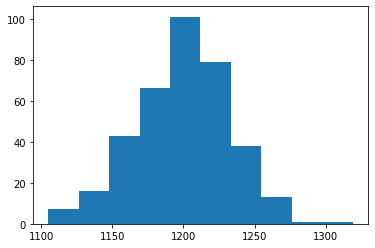

In [ ]:
# lets do a quick plot
# you will dive much deeper into plotting in your next course
plt.hist(year)

(array([ 1.,  0.,  0.,  1.,  4., 13., 13.,  8.,  8.,  4.]),
 array([1122., 1141., 1160., 1179., 1198., 1217., 1236., 1255., 1274.,
        1293., 1312.]),
 <a list of 10 Patch objects>)

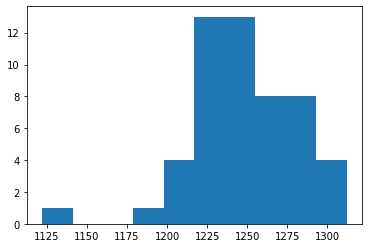

In [ ]:
# Example

# A cafe owner contacted your analytics firm to help understand capacity

# In a given week, they sell 1250 bagels that are baked in-house
# They will lose money if they do not have enough ingredients to satisfy demand

# Over a 52 week period, how many weeks can they expect to sell 1300 or more bagels?

bagels = np.random.poisson(1250, 52)
plt.hist(bagels)

## Breakout Room Exercise

The same cafe owner from above has re-engaged your analytics firm to help estimate employee expenses which are a function of the number of orders.  

1.  The cafe is open 252 days a year
1.  On average, they have 2200 orders a day
1.  The owner has estimated that they need 1 employee for every 300 orders
1.  The daily cost for an employee is $125/day

Simulate this exercise 100 times.  What is the average annual employee cost?